In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt


In [2]:
np.set_printoptions(formatter={'float_kind' : '{:f}'.format})
sns.set(rc={'figure.figsize' :(12,10)})
pd.set_option('display.max_columns',None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
                      

In [3]:
#from google.colab import files
#uploaded = files.upload()
raw_data= pd.read_csv('Car_Dd_Assignment.csv') 

In [4]:
print(raw_data.shape)
raw_data.head()

(205, 27)


car_ID  symboling   name  year fueltype aspiration doornumber      carbody  \
0       1          3  Nexan  2015      gas        std        two  convertible   
1       2          3  Nexan  2015      gas        std        two  convertible   
2       3          1  Nexan  2015      gas        std        two    hatchback   
3       4          2    Kia  2019      gas        std       four        sedan   
4       5          2    Kia  2019      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

In [5]:
for column in raw_data:
  unique_vals = np.unique(raw_data[column])
  nr_values = len(unique_vals)
  if nr_values < 10:
    print('The number of values for feature {} : {} -- {}'.format(column,nr_values,unique_vals))
  else:
    print('The number of values for feature {} : {}'.format(column, nr_values))


The number of values for feature car_ID : 205
The number of values for feature symboling : 6 -- [-2 -1  0  1  2  3]
The number of values for feature name : 13
The number of values for feature year : 5 -- [2015 2016 2017 2018 2019]
The number of values for feature fueltype : 2 -- ['diesel' 'gas']
The number of values for feature aspiration : 2 -- ['std' 'turbo']
The number of values for feature doornumber : 2 -- ['four' 'two']
The number of values for feature carbody : 5 -- ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
The number of values for feature drivewheel : 3 -- ['4wd' 'fwd' 'rwd']
The number of values for feature enginelocation : 2 -- ['front' 'rear']
The number of values for feature wheelbase : 53
The number of values for feature carlength : 75
The number of values for feature carwidth : 44
The number of values for feature carheight : 49
The number of values for feature curbweight : 171
The number of values for feature enginetype : 7 -- ['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 

In [6]:
raw_data.isnull().sum()

car_ID              0
symboling           0
name                0
year                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

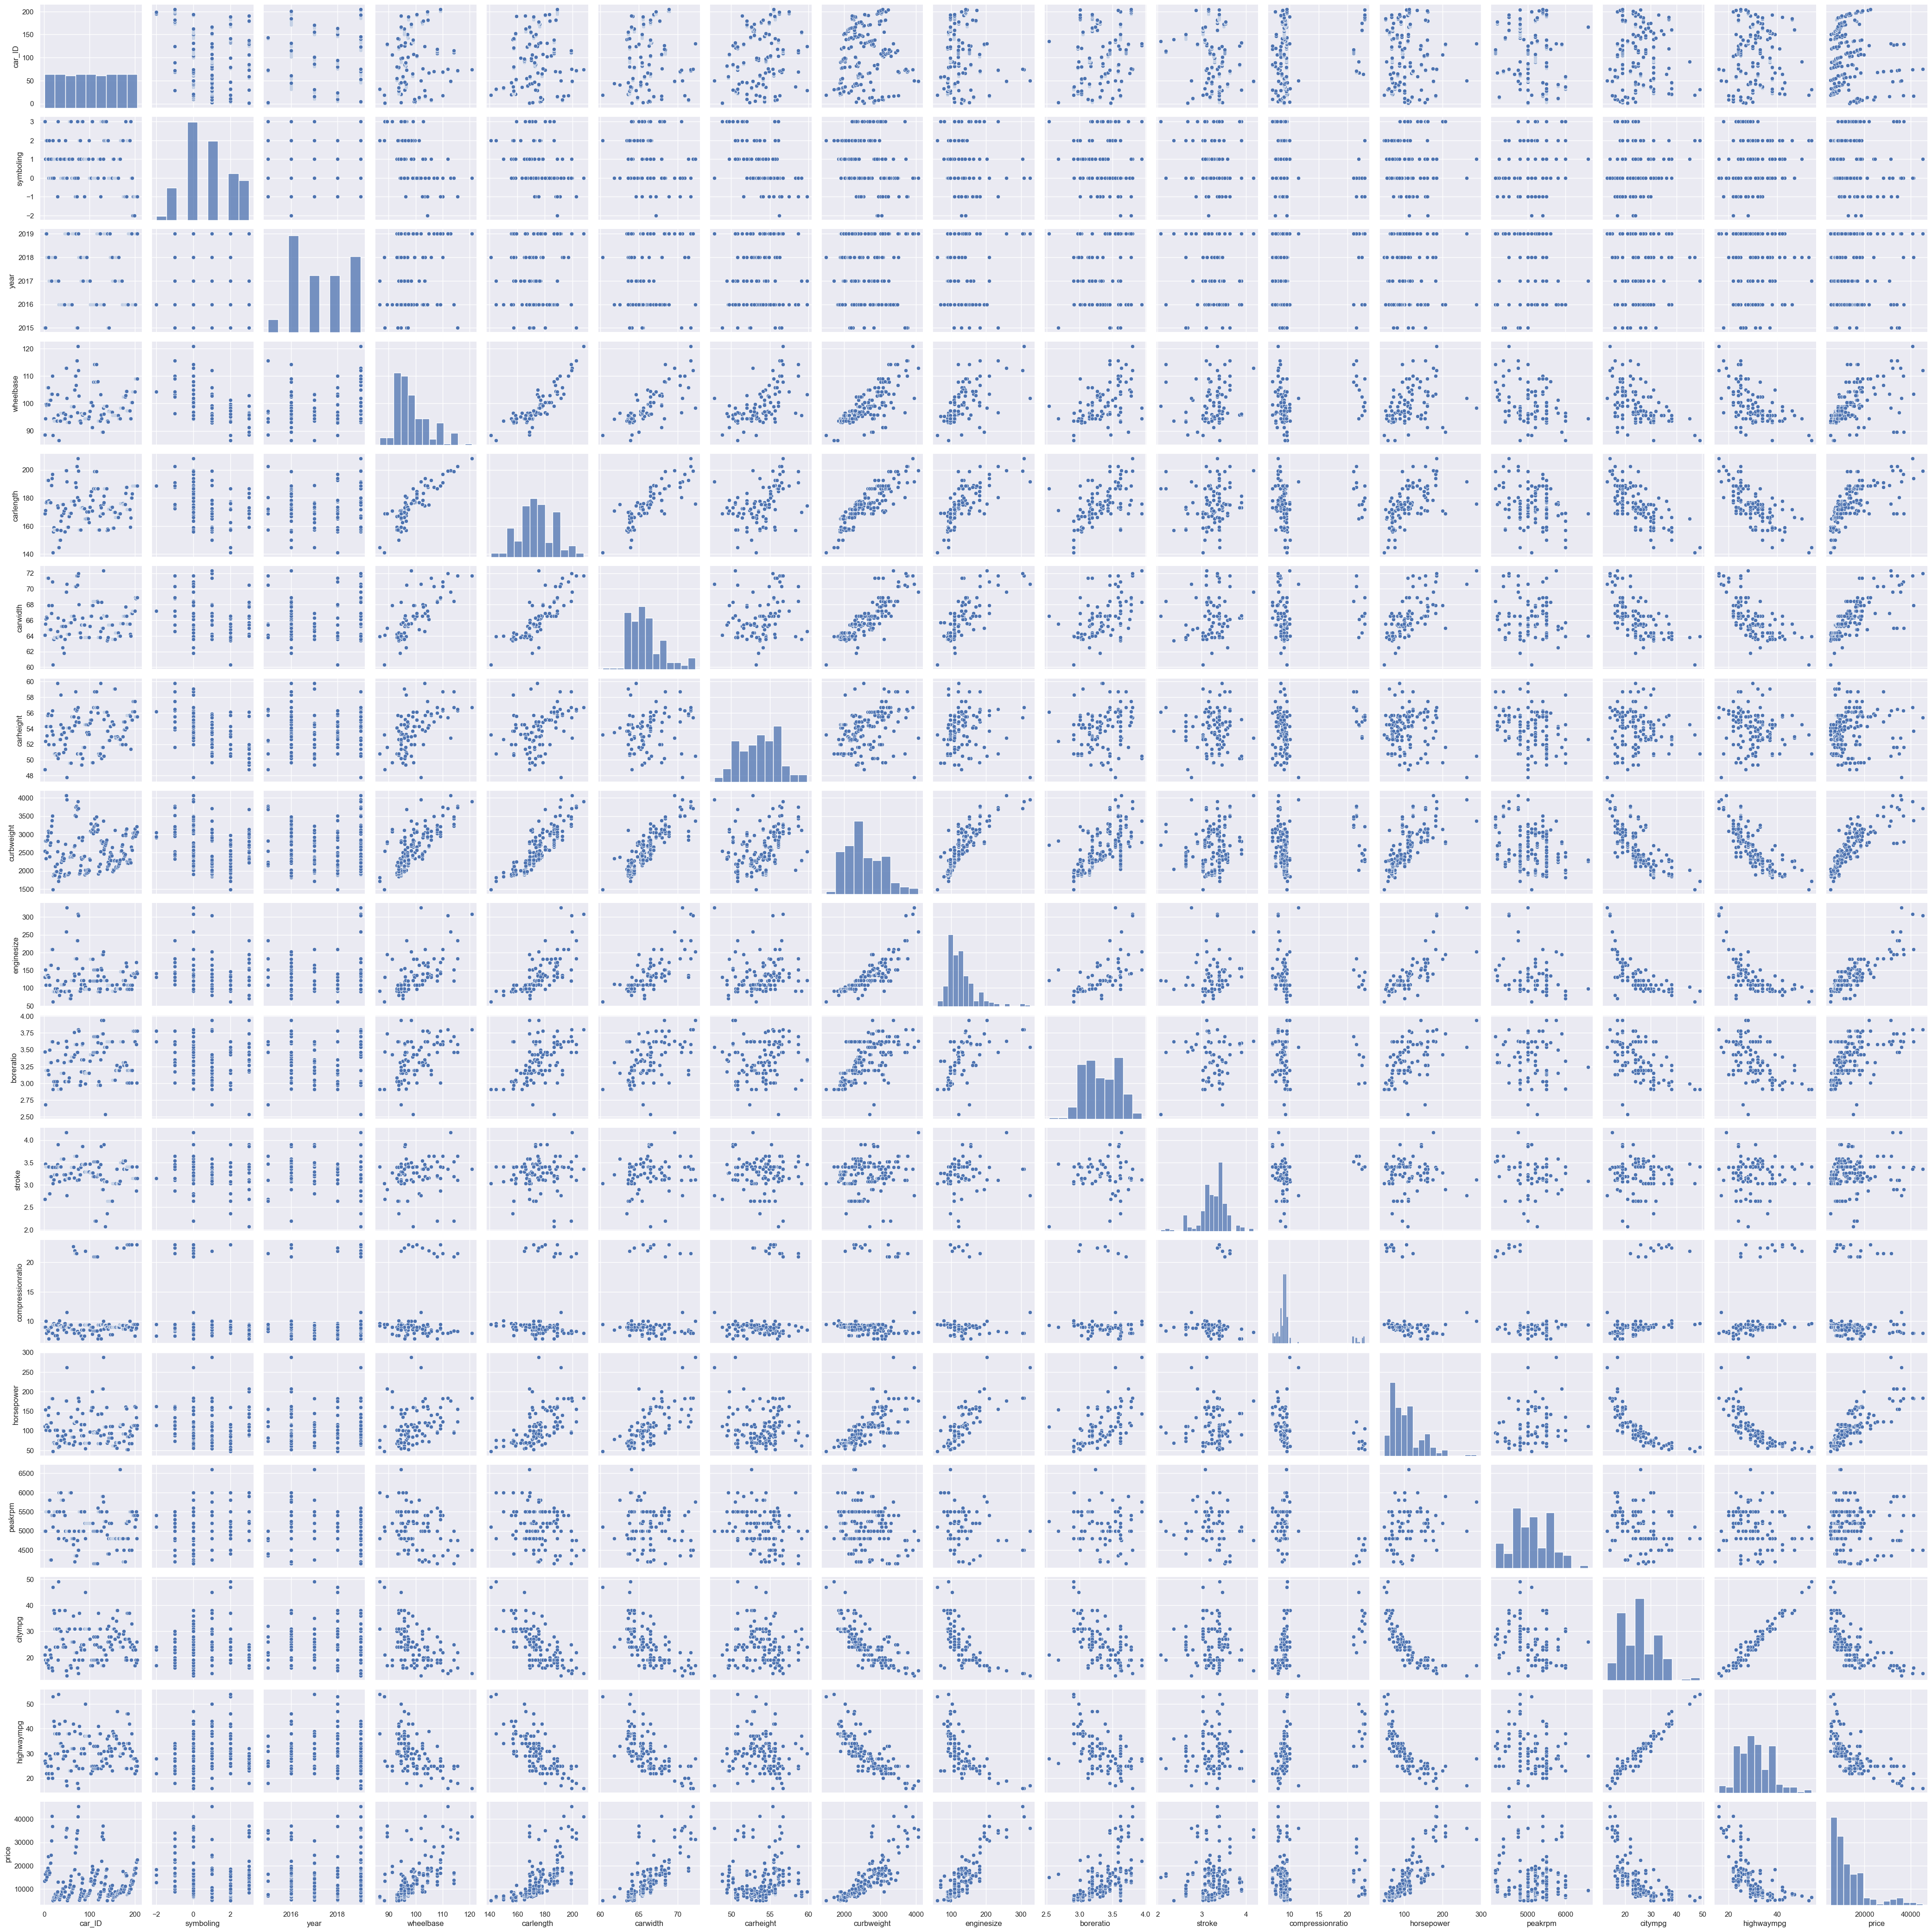

In [7]:
g = sns.pairplot(raw_data)


C:\Users\Gogul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


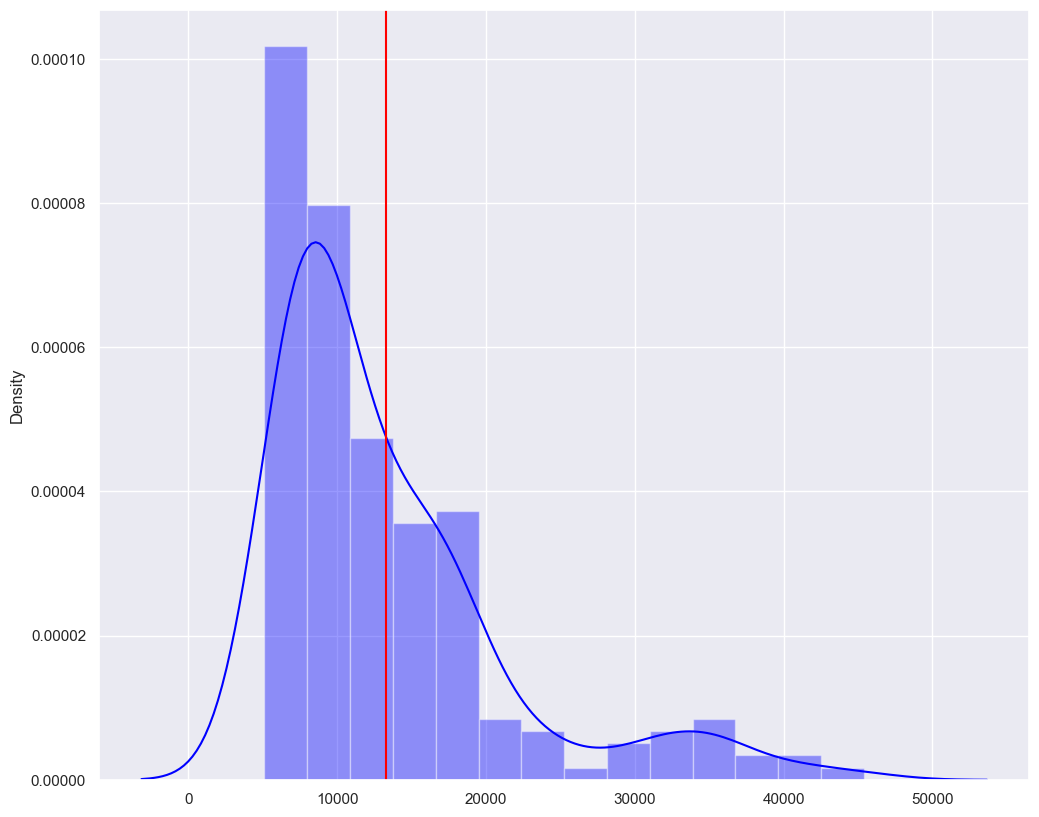

In [8]:
x = raw_data['price'].values
sns.distplot(x, color = 'blue');
mean = raw_data['price'].mean()
plt.axvline(mean, 0,1, color = 'red')

The meadian is:  10295.0


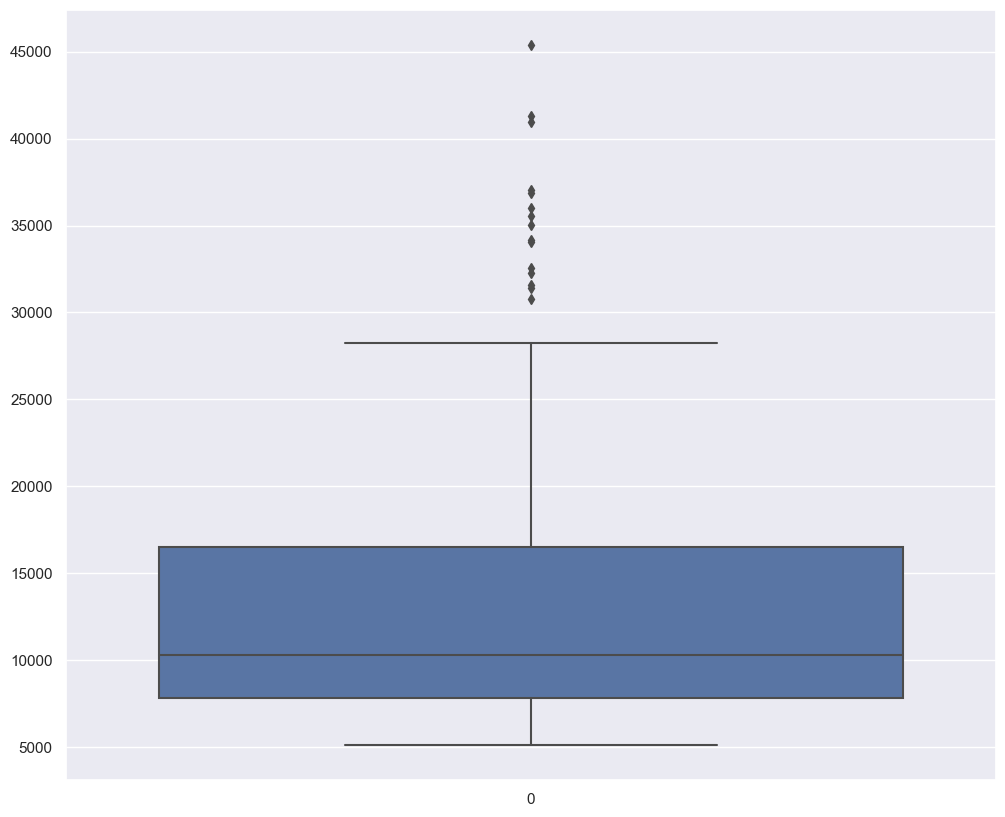

In [9]:
x = raw_data['price'].values
ax = sns.boxplot(x)
print('The meadian is: ', raw_data['price'].median())

The meadian is:  103.0


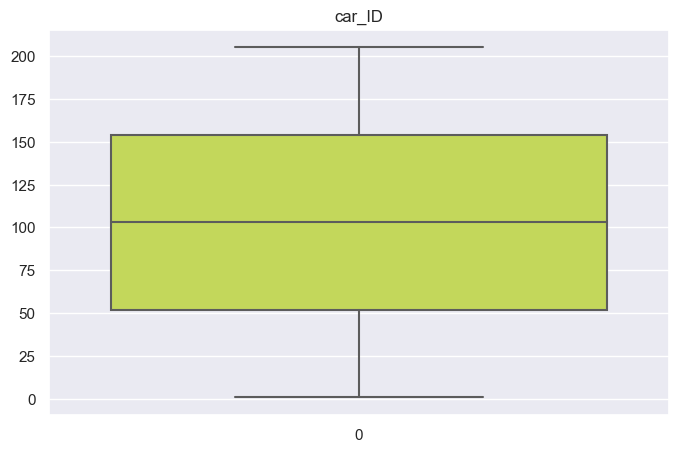

The meadian is:  1.0


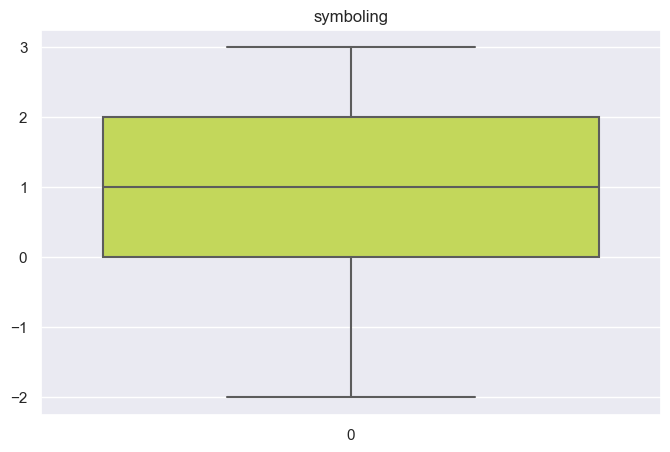

The meadian is:  2017.0


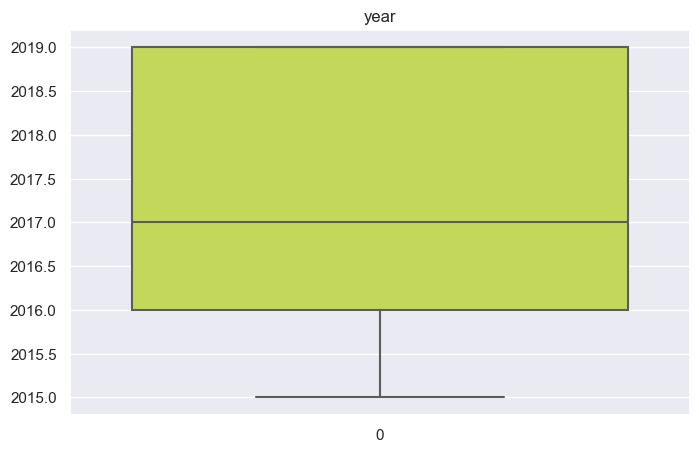

The meadian is:  97.0


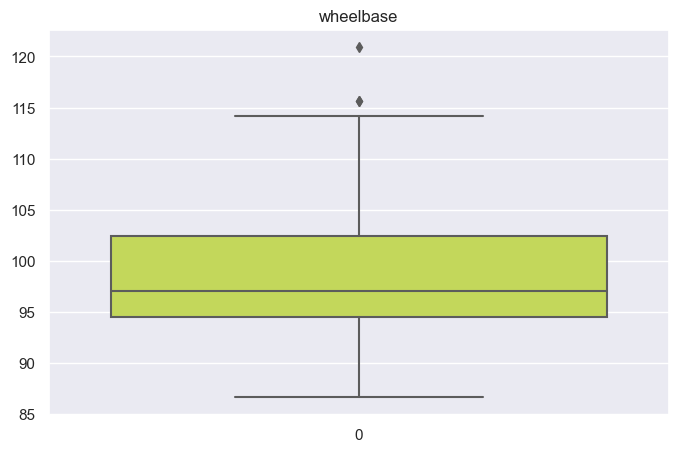

The meadian is:  173.2


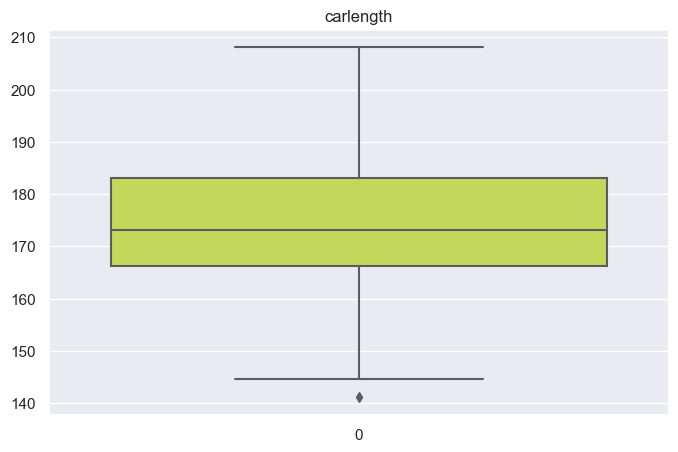

The meadian is:  65.5


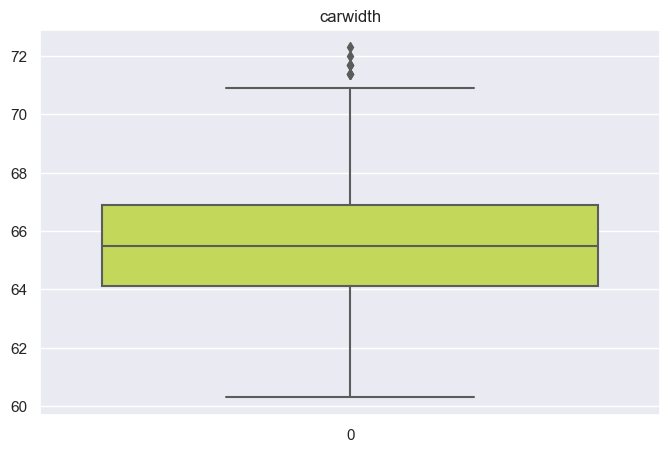

The meadian is:  54.1


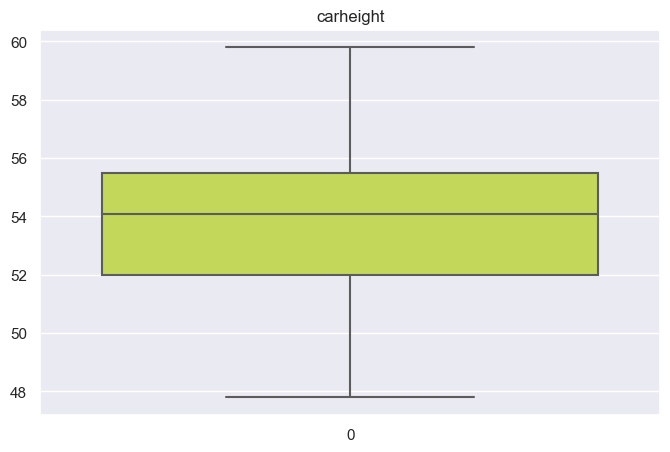

The meadian is:  2414.0


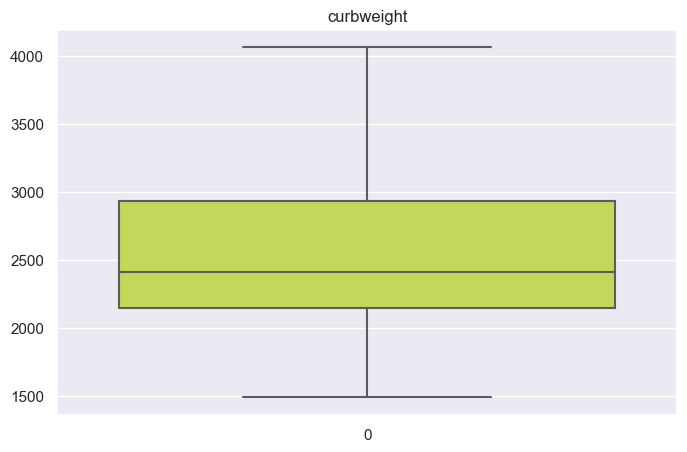

The meadian is:  120.0


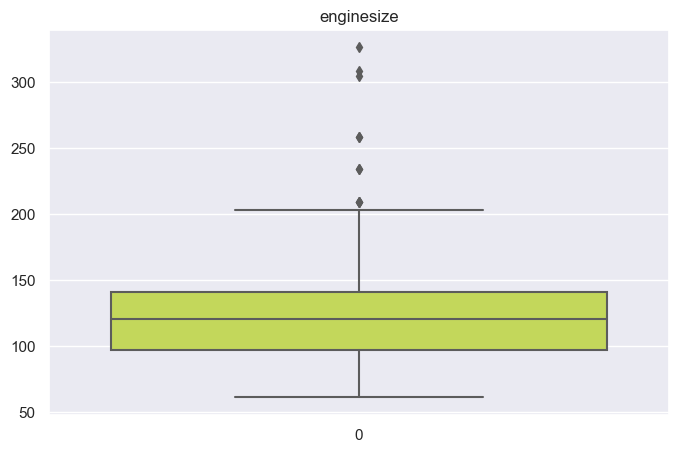

The meadian is:  3.31


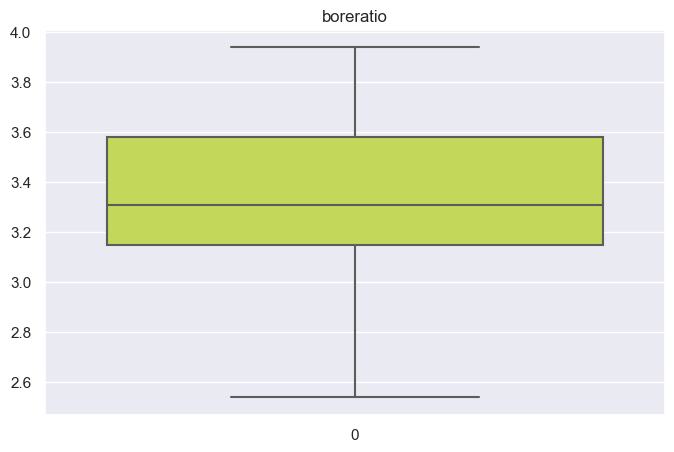

The meadian is:  3.29


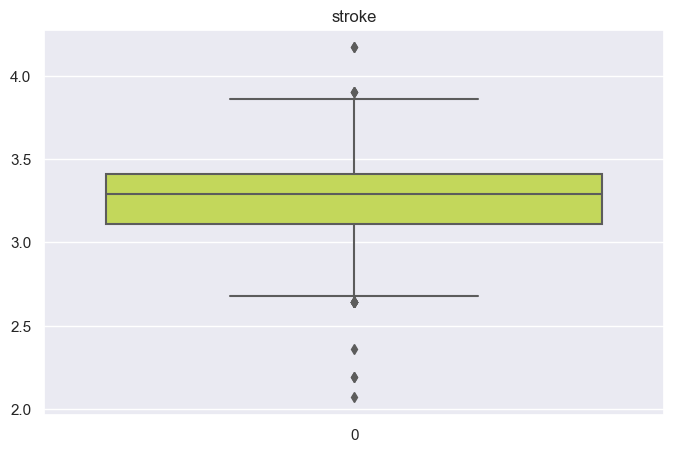

The meadian is:  9.0


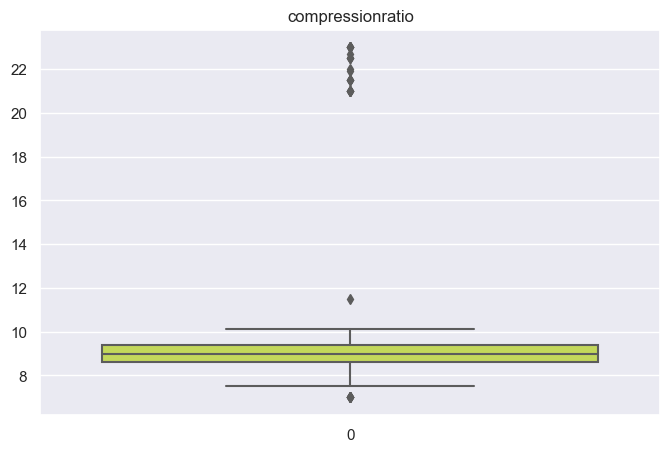

The meadian is:  95.0


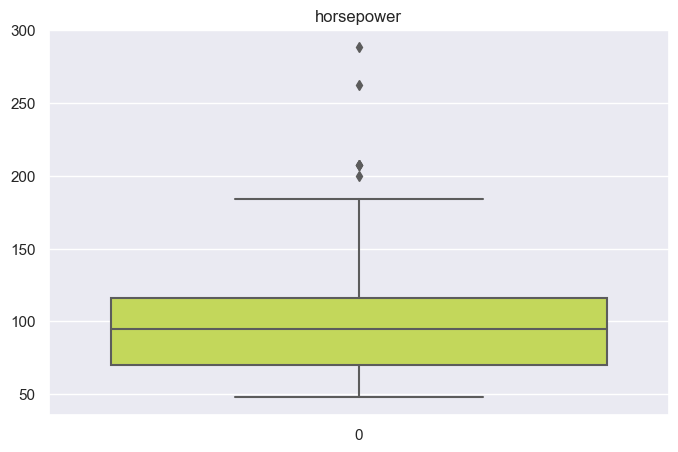

The meadian is:  5200.0


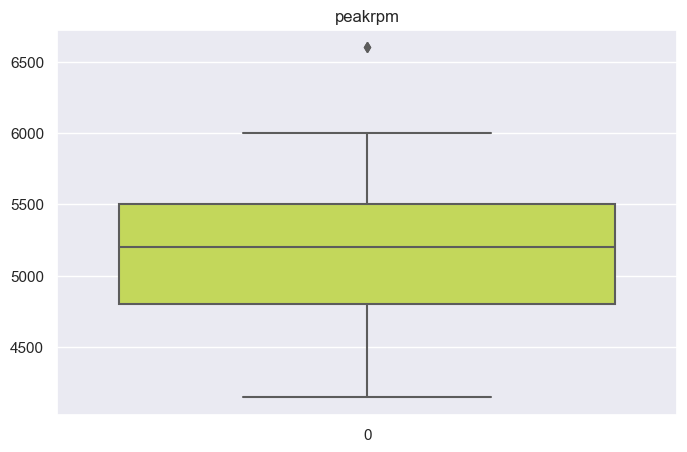

The meadian is:  24.0


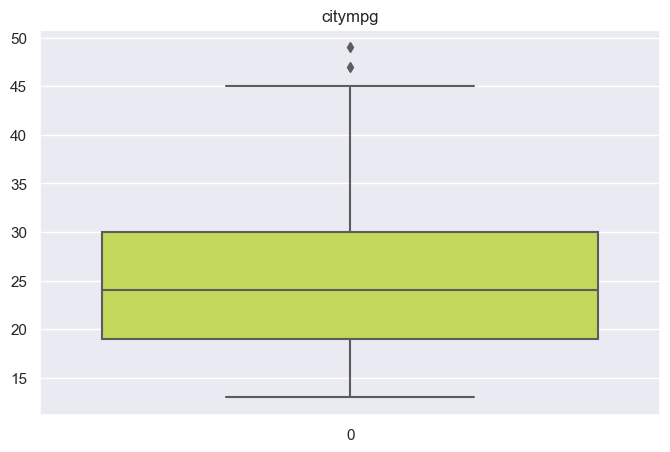

The meadian is:  30.0


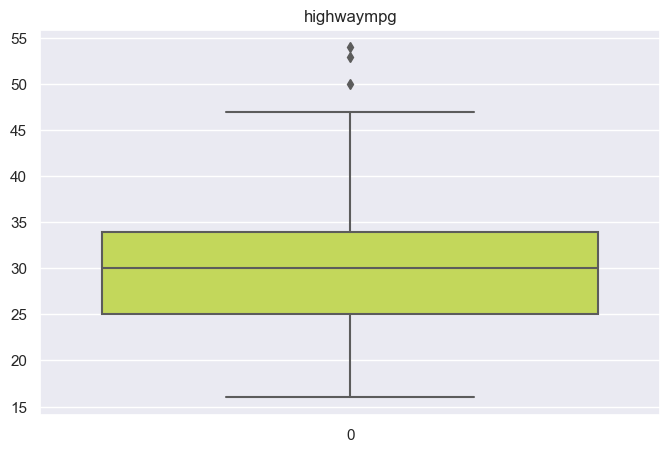

The meadian is:  10295.0


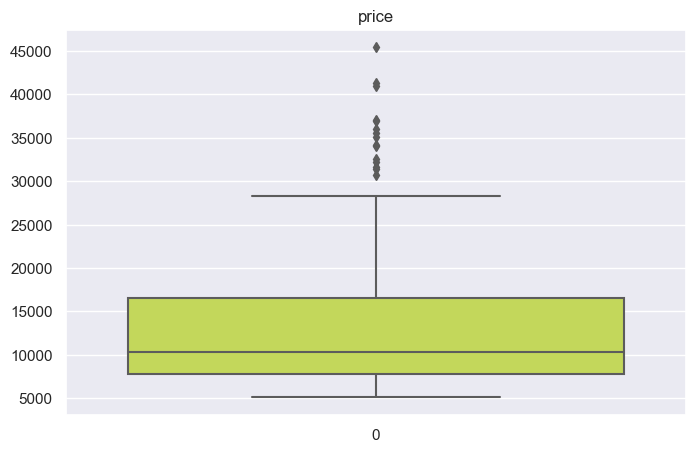

In [10]:
sns.set(rc={'figure.figsize':(8,5)})
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = raw_data.select_dtypes(include=numerics).columns
for c in n_variables:    
    x = raw_data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', raw_data[c].median())
    plt.title(c)
    plt.show()

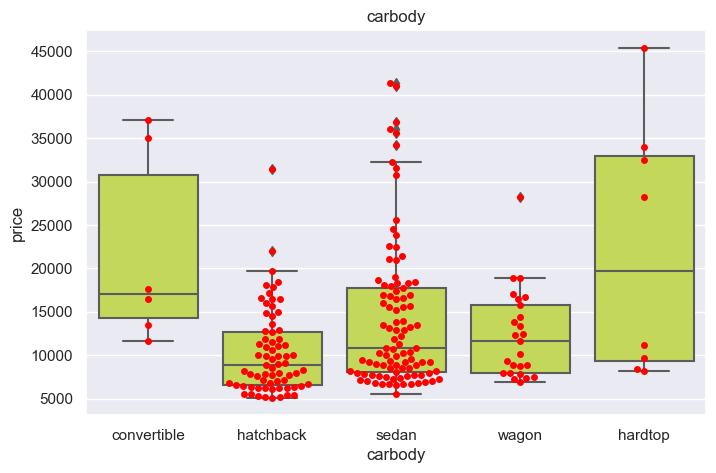

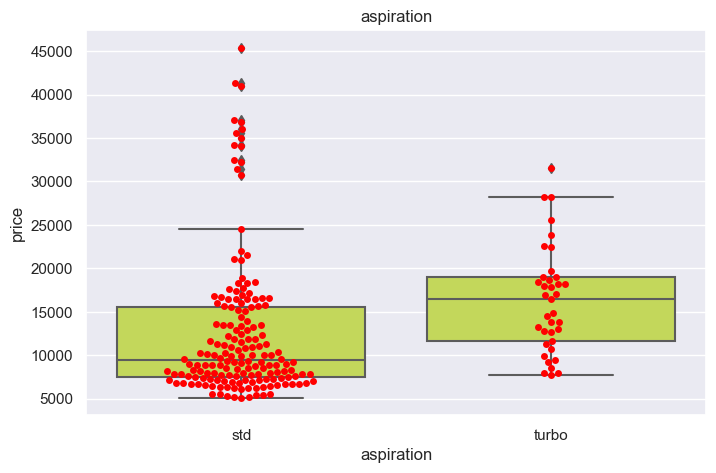

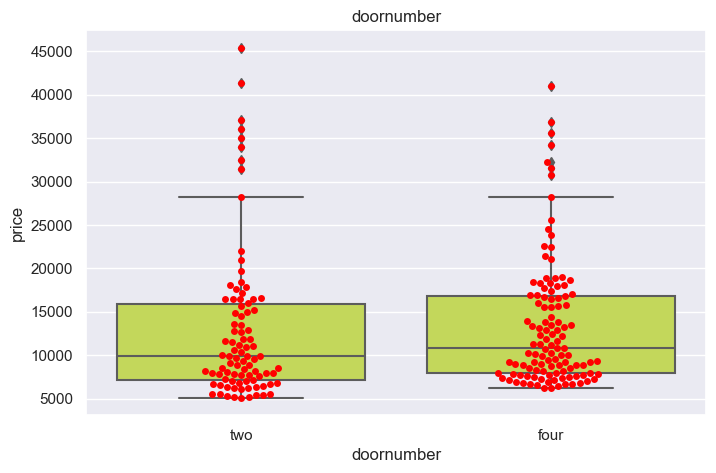

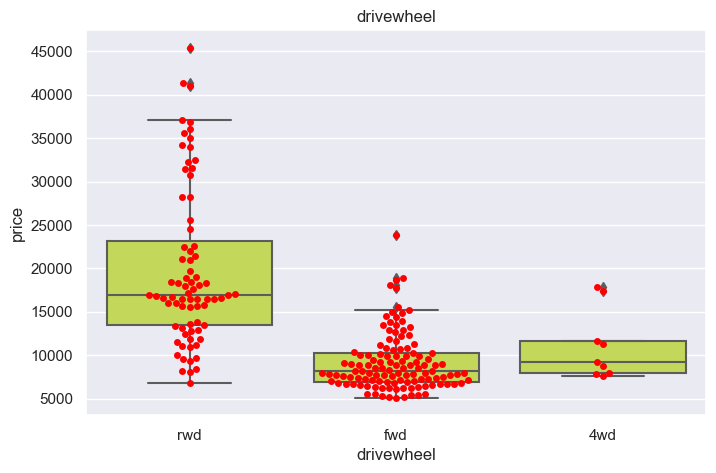

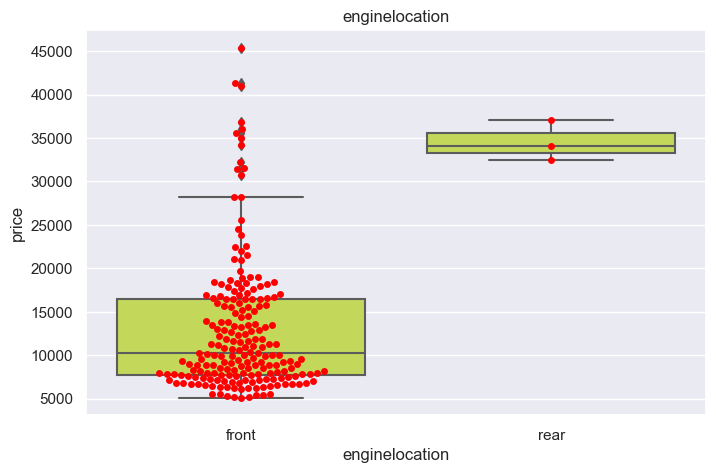

C:\Users\Gogul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\categorical.py:3543: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


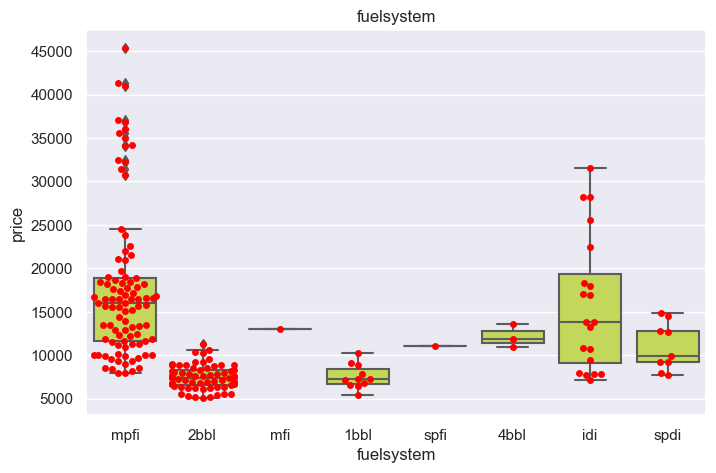

C:\Users\Gogul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\categorical.py:3543: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


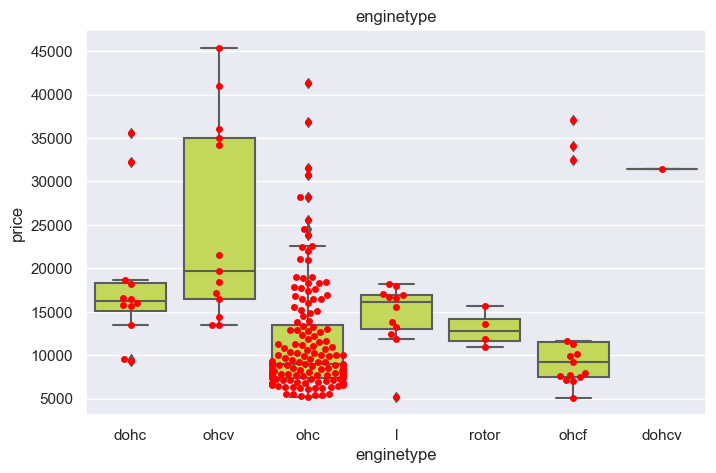

C:\Users\Gogul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\categorical.py:3543: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Gogul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\categorical.py:3543: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


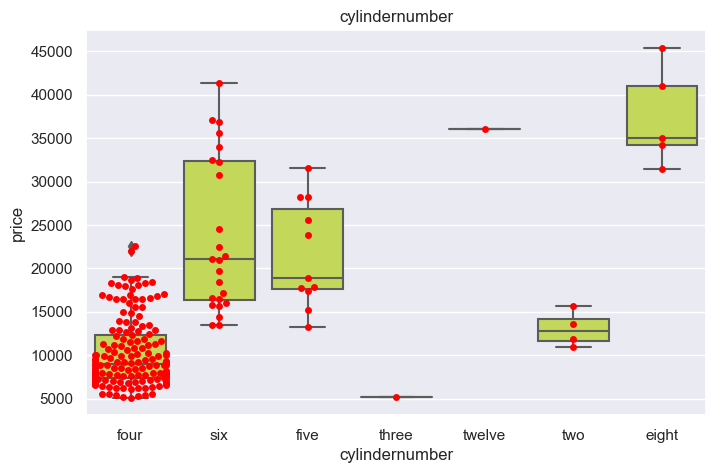

In [11]:
categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']
sns.set(rc={'figure.figsize':(8,5)})
for c in categories:
    ax = sns.boxplot(x=c, y="price", data=raw_data, color = '#D1EC46')
    ax = sns.swarmplot(x=c, y="price", data=raw_data, color="red")
    plt.title(c)
    plt.show()

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
raw_data.head()

car_ID  symboling   name  year fueltype aspiration doornumber      carbody  \
0       1          3  Nexan  2015      gas        std        two  convertible   
1       2          3  Nexan  2015      gas        std        two  convertible   
2       3          1  Nexan  2015      gas        std        two    hatchback   
3       4          2    Kia  2019      gas        std       four        sedan   
4       5          2    Kia  2019      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

In [14]:
new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
new_raw_data.head()

car_ID  symboling   name  year  wheelbase  carlength  carwidth  carheight  \
0       1          3  Nexan  2015       88.6      168.8      64.1       48.8   
1       2          3  Nexan  2015       88.6      168.8      64.1       48.8   
2       3          1  Nexan  2015       94.5      171.2      65.5       52.4   
3       4          2    Kia  2019       99.8      176.6      66.2       54.3   
4       5          2    Kia  2019       99.4      176.6      66.4       54.3   

   curbweight cylindernumber  enginesize  boreratio  stroke  compressionratio  \
0        2548           four         130       3.47    2.68               9.0   
1        2548           four         130       3.47    2.68               9.0   
2        2823            six         152       2.68    3.47               9.0   
3        2337           four         109       3.19    3.40              10.0   
4        2824           five         136       3.19    3.40               8.0   

   horsepower  peakrpm  citympg  highwaympg    price  carbody_convertible  \
0         111     5000       21          27  13495.0                    1   
1         111     5000       21          27  16500.0                    1   
2         154     5000       19          26  16500.0                    0   
3         102     5500       24          30  13950.0                    0   
4         115     5500       18          22  17450.0                    0   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0                0                  0              0              0   
1                0                  0              0              0   
2                0                  1              0              0   
3                0                  0              1              0   
4                0                  0              1              0   

   aspiration_std  aspiration_turbo  doornumber_four  doornumber_two  \
0               1                 0                0               1   
1               1                 0                0               1   
2               1                 0                0               1   
3               1                 0                1               0   
4               1                 0                1               0   

   drivewheel_4wd  drivewheel_fwd  drivewheel_rwd  enginelocation_front  \
0               0               0               1                     1   
1               0               0               1                     1   
2               0               0               1                     1   
3               0               1               0                     1   
4               1               0               0                     1   

   enginelocation_rear  fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  enginetype_dohc  enginetype_dohcv  enginetype_l  \
0                0                1                 0             0   
1                0                1                 0             0   
2                0                0                 0             0   
3                0                0                 0             0   
4               

In [15]:
new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'four'] = 4
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'five'] = 5
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'six'] = 6
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'eight'] = 8
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'twelve'] = 12
#new_raw_data['cylindernumber'] = new_raw_data['cylindernumber'].astype(int)
warnings.simplefilter(action='ignore', category=FutureWarning)
new_raw_data.dtypes

C:\Users\Gogul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


car_ID                    int64
symboling                 int64
name                     object
year                      int64
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber           object
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelo

In [16]:
del new_raw_data['name']

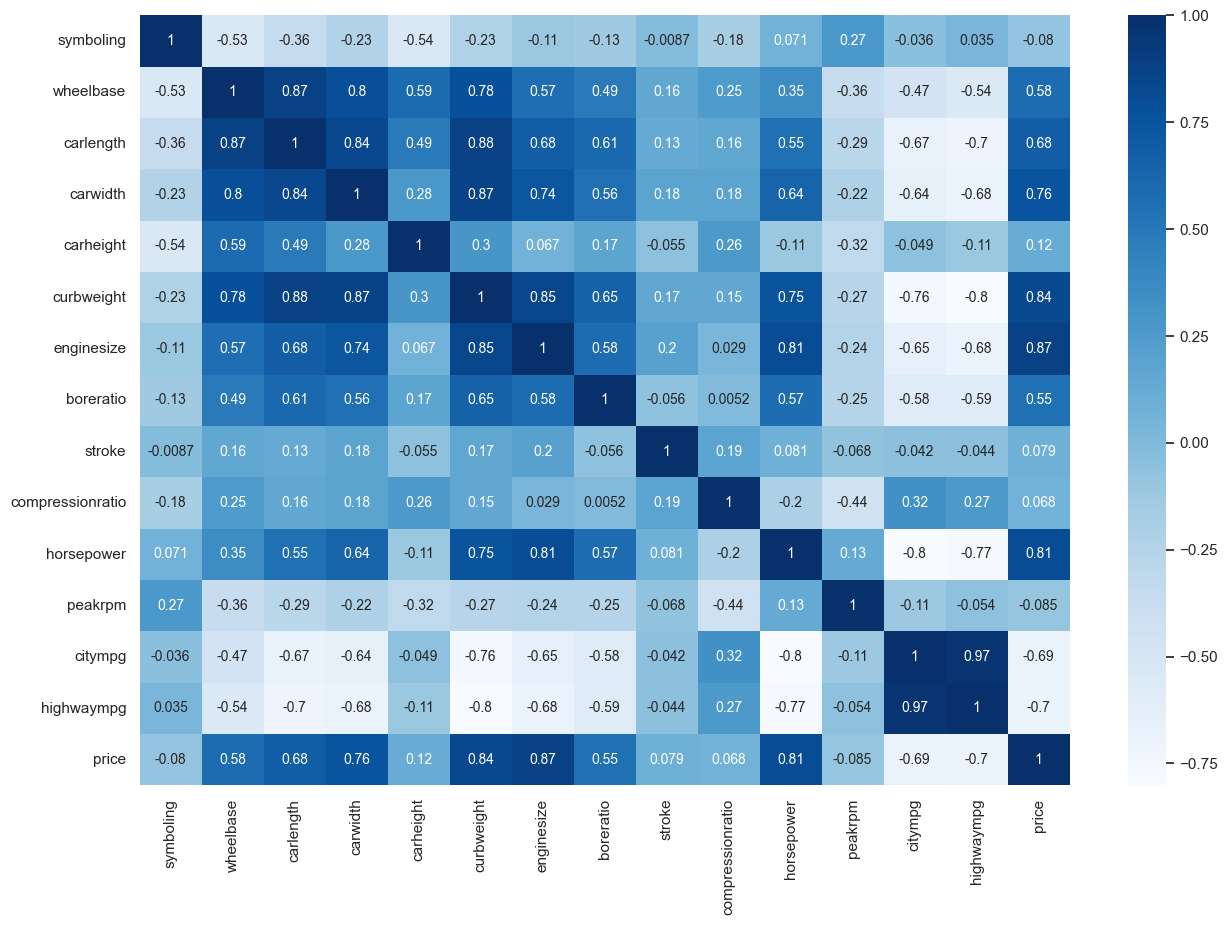

In [17]:

sns.set(rc={'figure.figsize':(15,10)})
n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
pc = new_raw_data[n_variables].corr(method ='pearson')
cols = n_variables
ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

In [18]:
pc


symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.531954  -0.357612 -0.232919  -0.541038   
wheelbase         -0.531954   1.000000   0.874587  0.795144   0.589435   
carlength         -0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth          -0.232919   0.795144   0.841118  1.000000   0.279210   
carheight         -0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight        -0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize        -0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio         -0.130051   0.488750   0.606454  0.559150   0.171071   
stroke            -0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio  -0.178515   0.249786   0.158414  0.181129   0.261214   
horsepower         0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm            0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           -0.035823  -0.470414  -0.670909 -0.642704  -0.048640   
highwaympg         0.034606  -0.544082  -0.704662 -0.677218  -0.107358   
price             -0.079978   0.577816   0.682920  0.759325   0.119336   

                  curbweight  enginesize  boreratio    stroke  \
symboling          -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase           0.776386    0.569329   0.488750  0.160959   
carlength           0.877728    0.683360   0.606454  0.129533   
carwidth            0.867032    0.735433   0.559150  0.182942   
carheight           0.295572    0.067149   0.171071 -0.055307   
curbweight          1.000000    0.850594   0.648480  0.168790   
enginesize          0.850594    1.000000   0.583774  0.203129   
boreratio           0.648480    0.583774   1.000000 -0.055909   
stroke              0.168790    0.203129  -0.055909  1.000000   
compressionratio    0.151362    0.028971   0.005197  0.186110   
horsepower          0.750739    0.809769   0.573677  0.080940   
peakrpm            -0.266243   -0.244660  -0.254976 -0.067964   
citympg            -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg         -0.797465   -0.677470  -0.587012 -0.043931   
price               0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbweight         -0.797465  0.835305  
enginesize         -0.677470  0.874145  
boreratio          -0.587012  0.553173  
stroke             -0.043931  0.079443  
compressionratio    0.265201  0.067984  
horsepower         -0.770544  0.808139  
peakrpm            -0.054275 -0.085267  
citympg             0.971337 -0.685751  
highwaympg          1.000000 -0.697599  
price              -0.697599  1.000000

In [19]:
X = new_raw_data.drop(['price'], axis = 1).values
X_columns = new_raw_data.drop(['price'], axis = 1)
Y = new_raw_data['price'] .astype(int)
print(X.shape)
print(Y.shape)

(205, 48)
(205,)


In [20]:
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [21]:
dt.feature_importances_

array([0.094029, 0.013522, 0.018391, 0.106337, 0.060545, 0.018972,
       0.140742, 0.240325, 0.001786, 0.029492, 0.034746, 0.029576,
       0.029340, 0.049510, 0.005187, 0.043283, 0.023490, 0.001297,
       0.001297, 0.003083, 0.013457, 0.001786, 0.003572, 0.001786,
       0.001297, 0.009249, 0.000000, 0.008393, 0.003083, 0.000000,
       0.000000, 0.000000, 0.003572, 0.000000, 0.000000, 0.000000,
       0.002594, 0.000000, 0.000000, 0.000000, 0.001786, 0.000000,
       0.004472, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000])

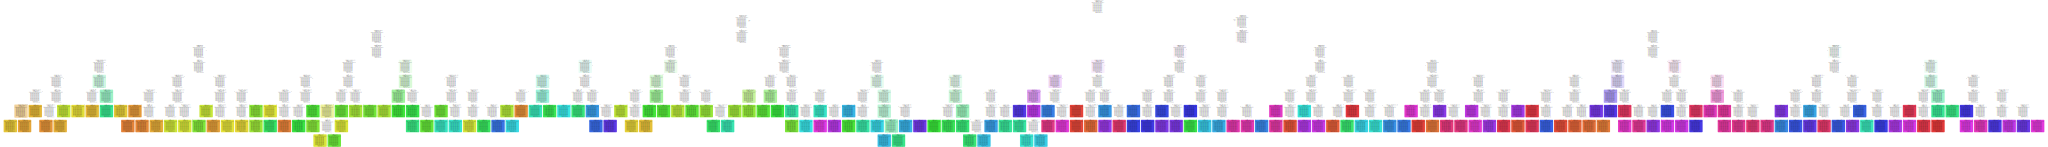

In [22]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=new_raw_data.drop('price', axis=1).columns,    
    class_names=new_raw_data['price'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [23]:
for i, column in enumerate(new_raw_data.drop('price', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi

final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature car_ID:, 0.094
Importance of feature symboling:, 0.014
Importance of feature year:, 0.018
Importance of feature wheelbase:, 0.106
Importance of feature carlength:, 0.061
Importance of feature carwidth:, 0.019
Importance of feature carheight:, 0.141
Importance of feature curbweight:, 0.240
Importance of feature cylindernumber:, 0.002
Importance of feature enginesize:, 0.029
Importance of feature boreratio:, 0.035
Importance of feature stroke:, 0.030
Importance of feature compressionratio:, 0.029
Importance of feature horsepower:, 0.050
Importance of feature peakrpm:, 0.005
Importance of feature citympg:, 0.043
Importance of feature highwaympg:, 0.023
Importance of feature carbody_convertible:, 0.001
Importance of feature carbody_hardtop:, 0.001
Importance of feature carbody_hatchback:, 0.003
Importance of feature carbody_sedan:, 0.013
Importance of feature carbody_wagon:, 0.002
Importance of feature aspiration_std:, 0.004
Importance of feature aspiration_turbo:, 0.

index              Variable  Feature Importance Score
0       7            curbweight                  0.240325
1       6             carheight                  0.140742
2       3             wheelbase                  0.106337
3       0                car_ID                  0.094029
4       4             carlength                  0.060545
5      13            horsepower                  0.049510
6      15               citympg                  0.043283
7      10             boreratio                  0.034746
8      11                stroke                  0.029576
9       9            enginesize                  0.029492
10     12      compressionratio                  0.029340
11     16            highwaympg                  0.023490
12      5              carwidth                  0.018972
13      2                  year                  0.018391
14      1             symboling                  0.013522
15     20         carbody_sedan                  0.013457
16     25        doornumber_two                  0.009249
17     27        drivewheel_fwd                  0.008393
18     14               peakrpm                  0.005187
19     42        enginetype_ohc                  0.004472
20     22        aspiration_std                  0.003572
21     32       fuelsystem_2bbl                  0.003572
22     19     carbody_hatchback                  0.003083
23     28        drivewheel_rwd                  0.003083
24     36       fuelsystem_mpfi                  0.002594
25     40      enginetype_dohcv                  0.001786
26     21         carbody_wagon                  0.001786
27     23      aspiration_turbo                  0.001786
28      8        cylindernumber                  0.001786
29     24       doornumber_four                  0.001297
30     17   carbody_convertible                  0.001297
31     18       carbody_hardtop                  0.001297
32     30   enginelocation_rear                  0.000000
33     31       fuelsystem_1bbl                  0.000000
34     46       fueltype_diesel                  0.000000
35     45      enginetype_rotor                  0.000000
36     44       enginetype_ohcv                  0.000000
37     43       enginetype_ohcf                  0.000000
38     41          enginetype_l                  0.000000
39     39       enginetype_dohc                  0.000000
40     38       fuelsystem_spfi                  0.000000
41     37       fuelsystem_spdi                  0.000000
42     26        drivewheel_4wd                  0.000000
43     35        fuelsystem_mfi                  0.000000
44     34        fuelsystem_idi                  0.000000
45     33       fuelsystem_4bbl                  0.000000
46     29  enginelocation_front                  0.000000
47     47          fueltype_gas                  0.000000

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size = 0.2, random_state=15)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(164, 48)
(41, 48)
(164,)
(41,)


In [25]:
regr = RandomForestRegressor(max_depth=2 , random_state=0)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_train)

In [26]:
print('The Accuracy  on the testing dataset is: ',regr.score(X_test,Y_test))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(Y_test, regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(Y_test, regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.8773683715368668
The RMSE  on the testing dataset is:  2923.9612179636215
The MAE  on the testing dataset is:  2128.052006257332


In [27]:
from sklearn.model_selection import GridSearchCV
param_grid ={
    'bootstrap' : [True],
    'max_depth' :[80,90,100,110],
    'max_features' : [2,3],
    'min_samples_leaf' : [3,4,5],
    'min_samples_split' : [8,10,12],
    'n_estimators' : [100,200,300,1000]
}
grid_search = GridSearchCV(estimator = regr, param_grid = param_grid, cv=3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [28]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200, random_state=0)

In [29]:
best_grid = grid_search.best_estimator_
regr = best_grid
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_train)

In [30]:
print('The Accuracy  on the testing dataset is: ',regr.score(X_test,Y_test))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(Y_test, regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(Y_test, regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.8792586317521053
The RMSE  on the testing dataset is:  2901.3385388025363
The MAE  on the testing dataset is:  1637.8845488340316


In [31]:
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = Y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Prediction'] = Y_pred
print(final_df.shape)

final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = Y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Prediction'] = regr.predict(X_test)
print(final_df2.shape)

final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()

raw_data['car_ID'] = raw_data['car_ID'].astype(int)
final_df3['car_ID'] = final_df3['car_ID'].astype(int)

final_df4 = raw_data.merge((final_df3)[['car_ID', 'Phase' , 'Price Prediction' ]], how = 'left' , on ='car_ID')
#final_df4['name'] = final_df4['name'] + ' _ ' + final_df4['car_ID'].astype(str)
#df1['key'] = df1['Order_ID'] + '_' + df1['Date'].apply(str)
print(final_df4.shape)
final_df4.head()


(164, 51)
(41, 51)
(205, 51)
(205, 29)


car_ID  symboling   name  year fueltype aspiration doornumber      carbody  \
0       1          3  Nexan  2015      gas        std        two  convertible   
1       2          3  Nexan  2015      gas        std        two  convertible   
2       3          1  Nexan  2015      gas        std        two    hatchback   
3       4          2    Kia  2019      gas        std       four        sedan   
4       5          2    Kia  2019      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price            Phase  Price Prediction  
0  13495.0    Existing data      16092.933942  
1  16500.0    Existing data      16092.933942  
2  16500.0  New unseen data      17596.900163  
3  13950.0    Existing data      12761.881992  
4  17450.0    Existing data      17529.281841

In [33]:
#from google.colab import drive
#drive.mount('drive')
final_df4.to_csv('Car_Dd_Predicted.csv')
#!cp data.csv "drive/My Drive/"

In [34]:
import pickle
pickle.dump(regr,open("Car_Dd_Predicted.pkl","wb"))